<a href="https://colab.research.google.com/github/cow-coding/ML-DL-Study/blob/master/DL%20from%20Scratch/Book%201/Chap05/2.ActivationFunctionLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library import

In [3]:
import numpy as np

# Activation Function

활성화 함수에는 대표적으로 ReLU와 Sigmoid가 있다.  
이 두가지를 신경망으로 구성해보자.

## ReLU Function

ReLU 함수의 식은 아래와 같다.  

$
y = 
\begin{cases}
x \quad (x > 0) \\
0 \quad (x \leq 0)
\end{cases}
$  

이 ReLU 함수에대한 역전파를 위해 ReLU의 편미분을 확인할 필요가 있다.  
  
$
\frac{\partial y}{\partial x} = 
\begin{cases}
1 \quad (x > 0) \\
0 \quad (x \leq 0)
\end{cases}
$ 
  

ReLU의 편미분 구조는 아래와 같다.  

$$
\frac{\partial L}{\partial y} \leftarrow \text{relu} \leftarrow \frac{\partial L}{\partial y} \quad (x > 0)
$$  

$$
0 \leftarrow \text{relu} \leftarrow \frac{\partial L}{\partial y} \quad (x \leq 0)
$$ 

## ReLU implementation

In [4]:
class ReLU:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx

### Principle of ReLU backpropagation

In [5]:
x = np.array( [[1.0, -0.5], [-2.0, 3.0]] )
print(x)

mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


## Sigmoid Function

시그모이드 함수는 아래와 같다.  

$$
y = \frac{1}{1 + exp(-x)}
$$  

그리고 시그모이드의 역전파 편미분을 계산하기위해서 계산 그래프로 나타내보면 아래와 같다.

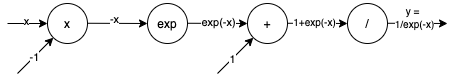

### First Step

가장 오른쪽의 노드인 '/'노드인 $y = \frac{1}{x}$를 미분하면 다음과 같다.

$$
\frac{\partial y}{\partial x} = -\frac{1}{x^2} \\
= -y^2
$$  

이 식을 간단하게 표현해보면 역전파는 순전파 출력값의 제곱에 음수를 붙인 값을 상류의 값(이전 값)에 곱해서 역으로 전달한다.

### Second Step

그 다음 노드인 '+'노드는 상류 값을 그대로 하류로 보낸다.

### Third Step

'exp'노드는 $y = exp(x)$의 연산이고 지수함수의 미분은 본인이 그대로 나온다.  

$$
\frac{\partial y}{\partial x} = exp(x) \\
$$  

상류의 값에 순전파 때의 출력을 곱해서 전달한다.

### Forth Step

'x'노드는 순전파때의 값을 교차하여 곱한다. 여기서는 -1을 곱한다.

### Total Step

$$
\frac{\partial L}{\partial y}y^{2}exp(-x) \ \leftarrow \ -\frac{\partial L}{\partial y}y^{2}exp(-x) \ \leftarrow \ -\frac{\partial L}{\partial y}y^2 \ \leftarrow \ -\frac{\partial L}{\partial y}y^2 \ \leftarrow \ \frac{\partial L}{\partial y} 
$$  

최종으로 나온 식(가장 왼쪽)을 다음과 같이 정리할 수 있다.  

$$
\frac{\partial L}{\partial y}y^{2}exp(-x)\\
 = \frac{\partial L}{\partial y}\frac{1}{(1+exp(-x))^2}exp(-x)\\
=\frac{\partial L}{\partial y}\frac{1}{1+exp(-x)}\frac{exp(-x)}{1+exp(-x)}\\
=\frac{\partial L}{\partial y}y(1-y)
$$

## Sigmoid implementation

In [6]:
class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out

    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out

    return dx